In [1]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_14168\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [7]:
arbolado = arboles[['comuna','nombre_cientifico','altura_arbol','diametro_altura_pecho']]
especies = arbolado['nombre_cientifico'].value_counts().index[:3]
arbolado = arbolado[arbolado['nombre_cientifico'].isin(especies)].sample(1000)

In [8]:
arbolado.head()

,comuna,nombre_cientifico,altura_arbol,diametro_altura_pecho
261865,12,Fraxinus pennsylvanica,8.0,21.0
51616,4,Platanus x acerifolia,15.0,58.0
38036,4,Fraxinus pennsylvanica,9.0,27.0
179678,10,Fraxinus pennsylvanica,3.0,2.0
337342,15,Fraxinus pennsylvanica,8.0,41.0


In [11]:
arbolado.isna().sum()

comuna                   0
nombre_cientifico        0
altura_arbol             0
diametro_altura_pecho    0
dtype: int64

In [10]:
arbolado.dropna(axis=0, inplace=True)

In [13]:
y = arbolado['nombre_cientifico']
y

261865    Fraxinus pennsylvanica
51616      Platanus x acerifolia
38036     Fraxinus pennsylvanica
179678    Fraxinus pennsylvanica
337342    Fraxinus pennsylvanica
                   ...          
4264       Platanus x acerifolia
9124      Fraxinus pennsylvanica
246319    Fraxinus pennsylvanica
299753    Fraxinus pennsylvanica
334581     Platanus x acerifolia
Name: nombre_cientifico, Length: 990, dtype: object

In [15]:
X = arbolado.drop(columns=['nombre_cientifico'])
X

,comuna,altura_arbol,diametro_altura_pecho
261865,12,8.0,21.0
51616,4,15.0,58.0
38036,4,9.0,27.0
179678,10,3.0,2.0
337342,15,8.0,41.0
...,...,...,...
4264,1,39.0,190.0
9124,1,12.0,39.0
246319,12,14.0,31.0
299753,13,14.0,32.0


In [17]:
X.dtypes
# En realidad comuna no tiene sentido usarlo como numerico pero lo vamos a dejar asi porque sirve para el ejemplo

comuna                     int64
altura_arbol             float64
diametro_altura_pecho    float64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
X_test
y_test

81427     Fraxinus pennsylvanica
3312      Fraxinus pennsylvanica
264212           Ficus benjamina
159663    Fraxinus pennsylvanica
2134      Fraxinus pennsylvanica
                   ...          
69557     Fraxinus pennsylvanica
23433     Fraxinus pennsylvanica
170982           Ficus benjamina
200753    Fraxinus pennsylvanica
334319    Fraxinus pennsylvanica
Name: nombre_cientifico, Length: 248, dtype: object

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Aca vamos a descartar la comuna y rearmar los dataset de testeo y entrenamiento
X_knn = X.drop(columns=['comuna'])
X_train, X_test, y_train, y_test = train_test_split(X_knn,y)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#display (y_pred_knn)


In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_knn)

#y.value_counts()

0.7862903225806451

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_knn = X.drop(columns=['comuna'])


In [48]:

X_train, X_test, y_train, y_test = train_test_split(X_knn,y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.7580645161290323

In [52]:
scaler.mean_

array([10.28436658, 36.81536388])

In [54]:
scaler2 = StandardScaler()
scaler2.fit(X_knn)
scaler2.mean_

array([10.13232323, 36.33131313])

In [59]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X,y)

tree.fit(X_train,y_train)
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9892183288409704

In [60]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.7661290322580645

[Text(0.6009811520887729, 0.9722222222222222, 'X[1] <= 14.5\ngini = 0.483\nsamples = 742\nvalue = [110, 507, 125]'),
 Text(0.30411635117493474, 0.9166666666666666, 'X[1] <= 5.5\ngini = 0.374\nsamples = 618\nvalue = [107, 476, 35]'),
 Text(0.097911227154047, 0.8611111111111112, 'X[2] <= 39.5\ngini = 0.508\nsamples = 109\nvalue = [51, 57, 1]'),
 Text(0.06005221932114883, 0.8055555555555556, 'X[2] <= 7.5\ngini = 0.497\nsamples = 97\nvalue = [40, 56, 1]'),
 Text(0.02610966057441253, 0.75, 'X[1] <= 2.5\ngini = 0.35\nsamples = 31\nvalue = [7, 24, 0]'),
 Text(0.015665796344647518, 0.6944444444444444, 'X[2] <= 3.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5, 0]'),
 Text(0.010443864229765013, 0.6388888888888888, 'X[0] <= 6.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.005221932114882507, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.015665796344647518, 0.5833333333333334, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(0.0104438642297650

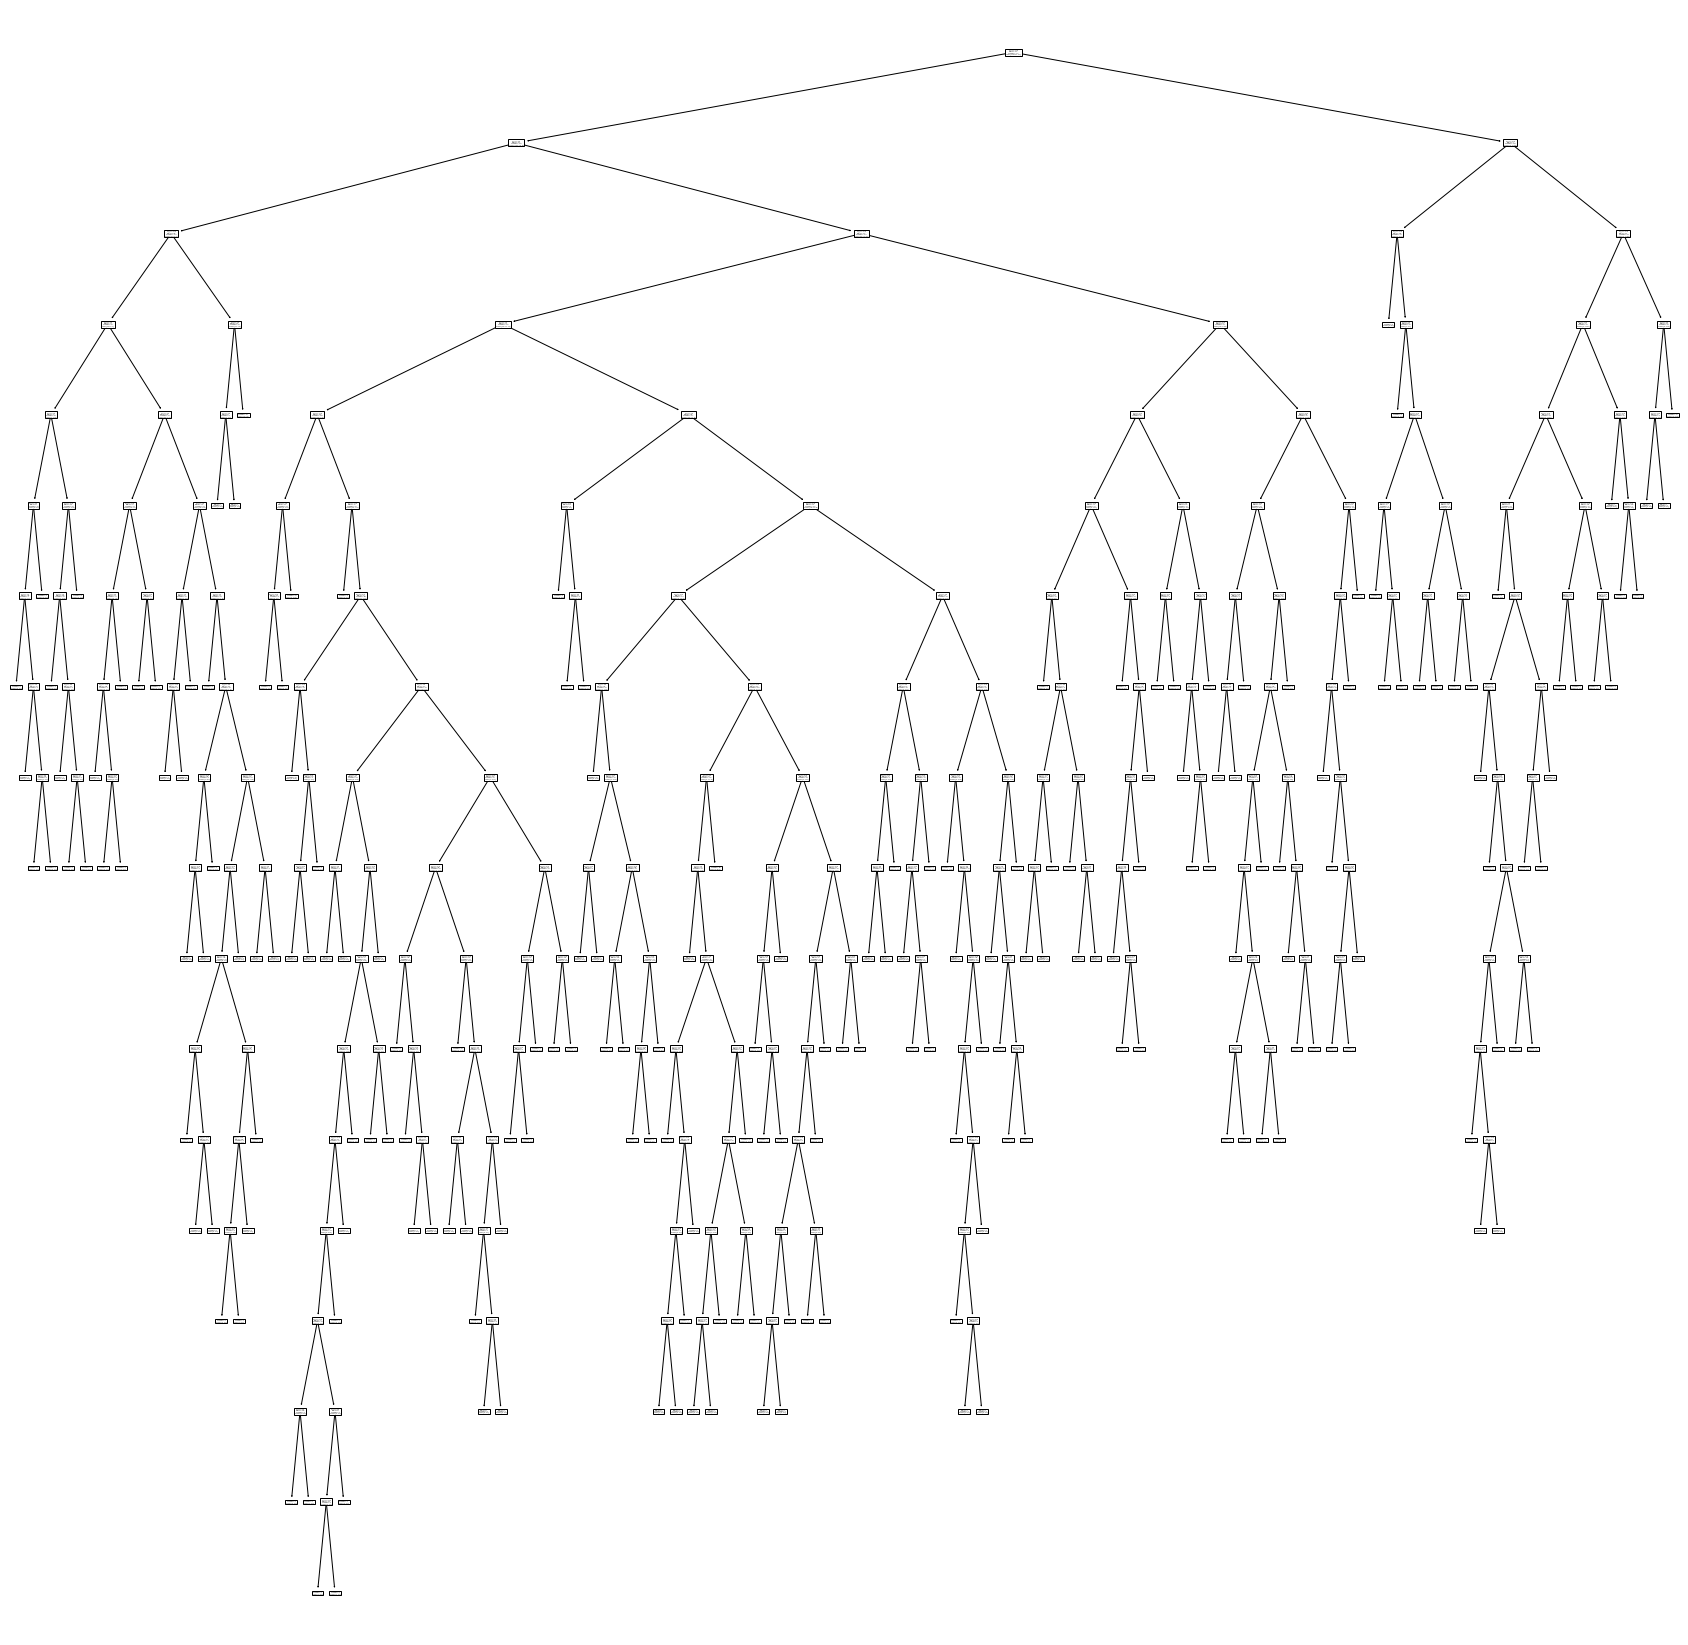

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plot_tree(tree_max,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 


In [66]:

tree = DecisionTreeClassifier(max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(X,y)

tree.fit(X_train,y_train)
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7857142857142857

[Text(0.5, 0.8333333333333334, 'altura_arbol <= 14.5\n742\n[108, 515, 119]\ny[1]'),
 Text(0.25, 0.5, 'altura_arbol <= 5.5\n623\n[105, 484, 34]\ny[1]'),
 Text(0.125, 0.16666666666666666, '112\n[53, 58, 1]\ny[1]'),
 Text(0.375, 0.16666666666666666, '511\n[52, 426, 33]\ny[1]'),
 Text(0.75, 0.5, 'diametro_altura_pecho <= 43.0\n119\n[3, 31, 85]\ny[2]'),
 Text(0.625, 0.16666666666666666, '31\n[1, 22, 8]\ny[1]'),
 Text(0.875, 0.16666666666666666, '88\n[2, 9, 77]\ny[2]')]

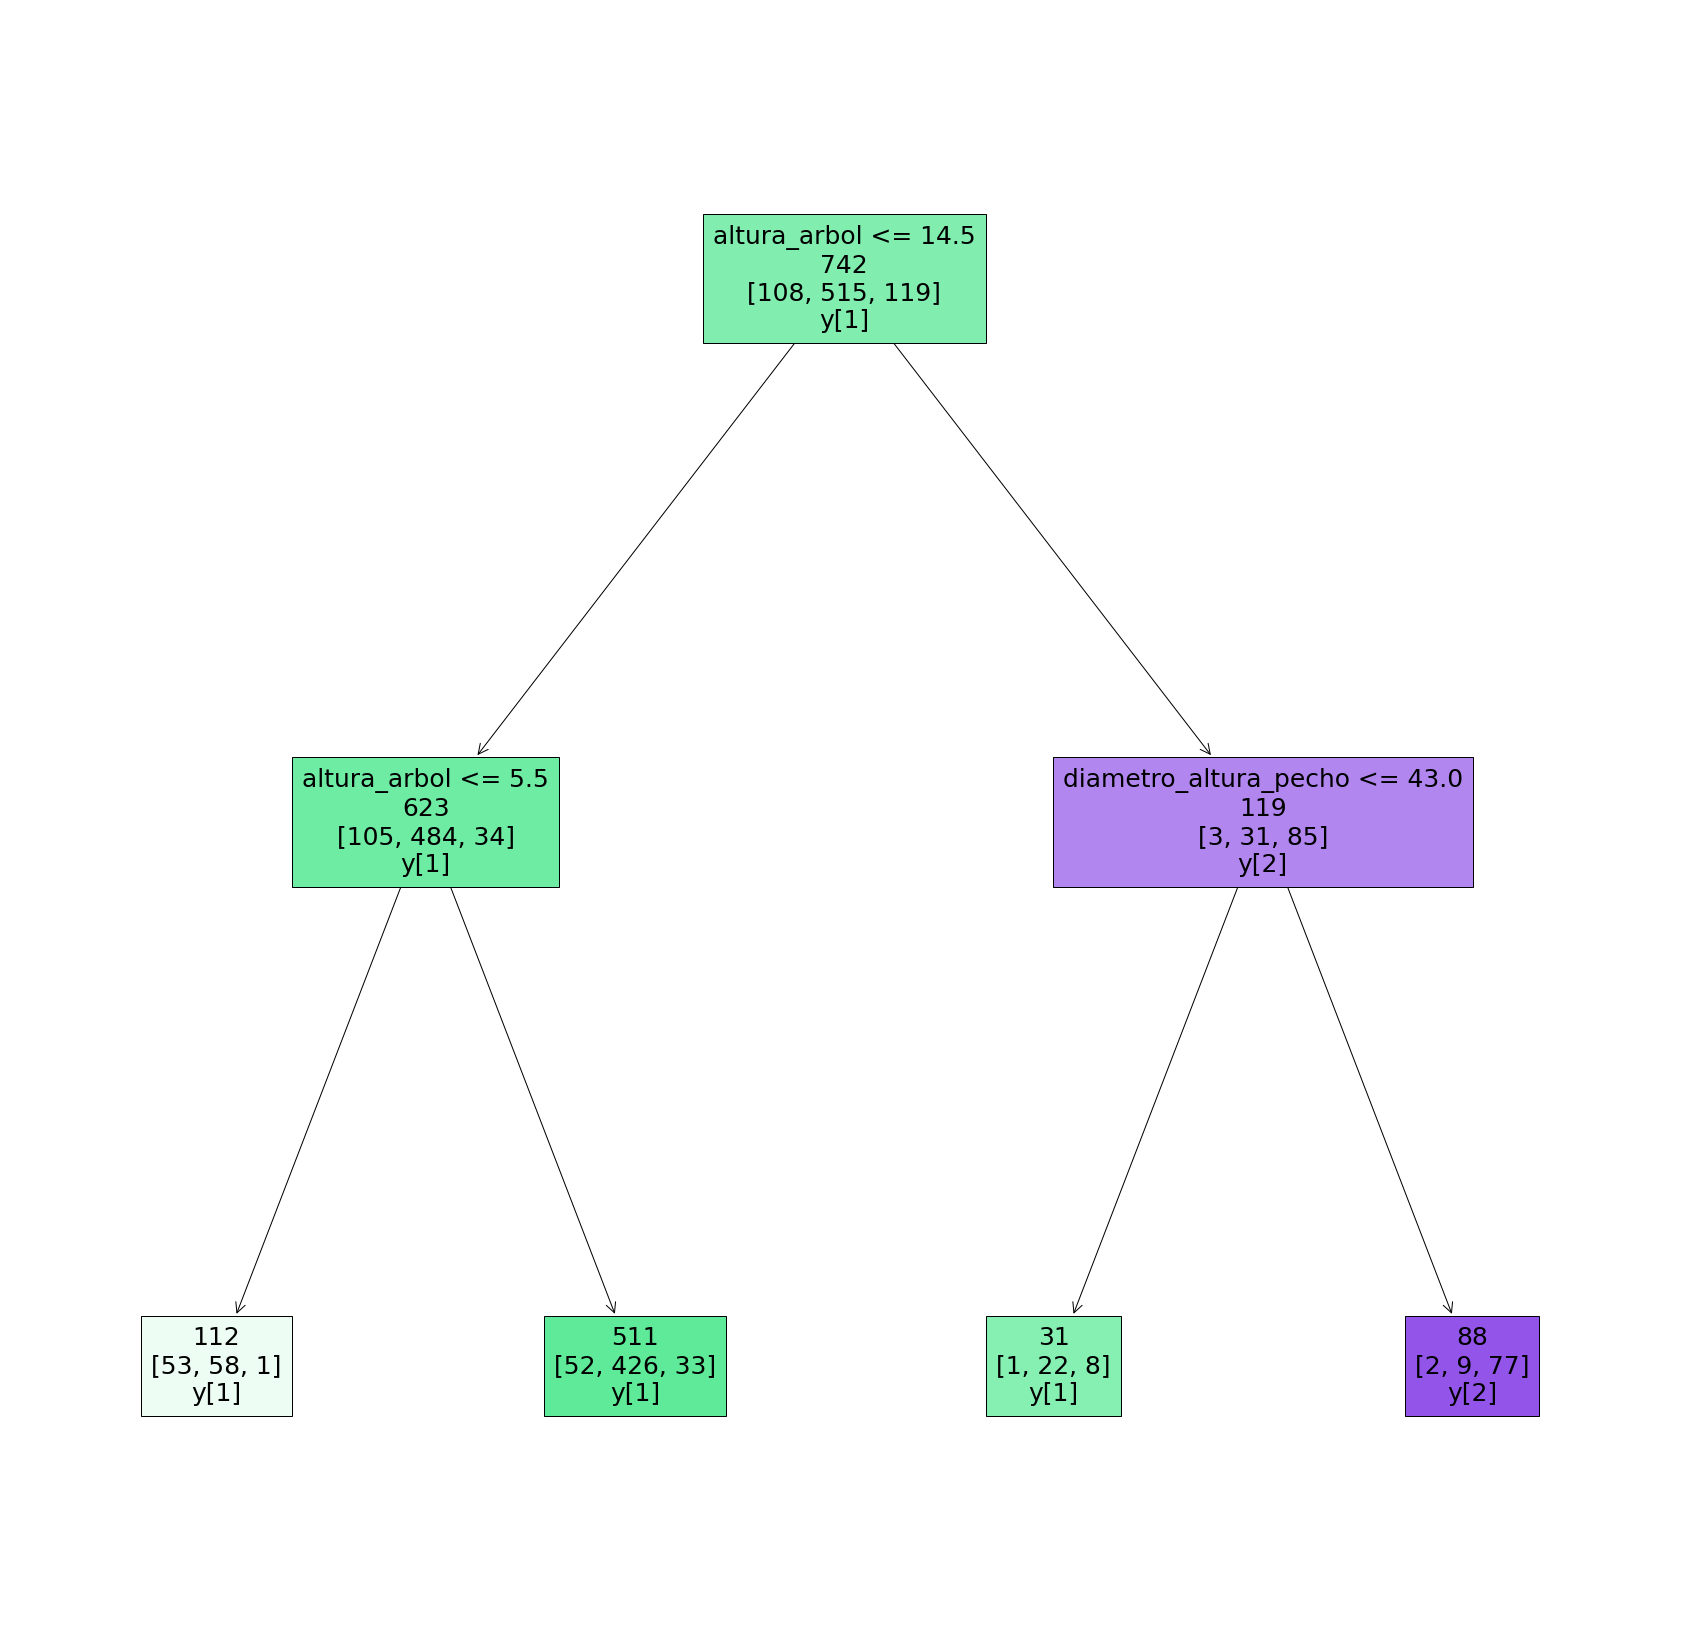

In [67]:
plt.figure(figsize=(30,30))
plot_tree(tree,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 

In [68]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.7741935483870968

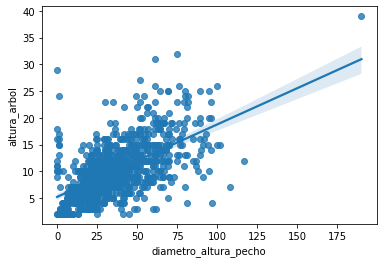

In [69]:
import seaborn as sns
ax = sns.regplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado)

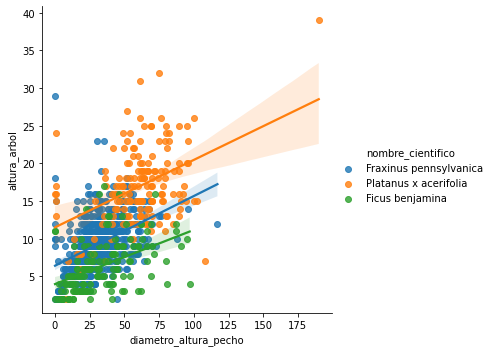

In [70]:
ax = sns.lmplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado, hue='nombre_cientifico')